In [1]:
import pandas as pd
pd.get_option("display.max_columns")
import plotly.express as px
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
from plotly.subplots import make_subplots
import plotly.graph_objects as go
import scipy.stats as stats
from sklearn.model_selection import train_test_split
import numpy as np
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from sklearn.preprocessing import OrdinalEncoder
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.ensemble import RandomForestRegressor 
from xgboost import XGBRegressor         
from sklearn.metrics import roc_curve

In [2]:
! pip install sklearn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


https://www.drivendata.org/competitions/66/flu-shot-learning/page/211/ <br>
***
https://towardsdatascience.com/journey-to-the-center-of-multi-label-classification-384c40229bff <br>
https://www.analyticsvidhya.com/blog/2021/10/handling-missing-value/ <br>
***

https://www.analyticsvidhya.com/blog/2017/08/introduction-to-multi-label-classification/ <vr>
https://www.analyticsvidhya.com/blog/2019/04/predicting-movie-genres-nlp-multi-label-classification/#h2_7 <br>


# Import Data and Creating Neccessary DataFrame

In [3]:
# To Import Data from google drive (authentication needed)
from google.colab import drive 
drive.mount('/content/gdrive')

Data = pd.read_csv('gdrive/MyDrive/Personal Data Science Projects/Flu Shot Learning/training_set_features.csv')
Data_target = pd.read_csv('gdrive/MyDrive/Personal Data Science Projects/Flu Shot Learning/training_set_labels.csv')
Data.head()

Mounted at /content/gdrive


,respondent_id,h1n1_concern,h1n1_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,...,income_poverty,marital_status,rent_or_own,employment_status,hhs_geo_region,census_msa,household_adults,household_children,employment_industry,employment_occupation
0,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,...,Below Poverty,Not Married,Own,Not in Labor Force,oxchjgsf,Non-MSA,0.0,0.0,NaN,NaN
1,1,3.0,2.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,...,Below Poverty,Not Married,Rent,Employed,bhuqouqj,"MSA, Not Principle City",0.0,0.0,pxcmvdjn,xgwztkwe
2,2,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,"<= $75,000, Above Poverty",Not Married,Own,Employed,qufhixun,"MSA, Not Principle City",2.0,0.0,rucpziij,xtkaffoo
3,3,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,...,Below Poverty,Not Married,Rent,Not in Labor Force,lrircsnp,"MSA, Principle City",0.0,0.0,NaN,NaN
4,4,2.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,...,"<= $75,000, Above Poverty",Married,Own,Employed,qufhixun,"MSA, Not Principle City",1.0,0.0,wxleyezf,emcorrxb


In [4]:
# Test_Data_identifier = Data_target[['respondent_id']]
# Test_Data_identifier.head()

In [5]:
Data_target.drop(columns='respondent_id',inplace=True)
Data_Graph = pd.concat( [Data,Data_target], axis=1 )
Data_Graph.head()

,respondent_id,h1n1_concern,h1n1_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,...,rent_or_own,employment_status,hhs_geo_region,census_msa,household_adults,household_children,employment_industry,employment_occupation,h1n1_vaccine,seasonal_vaccine
0,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,...,Own,Not in Labor Force,oxchjgsf,Non-MSA,0.0,0.0,NaN,NaN,0,0
1,1,3.0,2.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,...,Rent,Employed,bhuqouqj,"MSA, Not Principle City",0.0,0.0,pxcmvdjn,xgwztkwe,0,1
2,2,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,Own,Employed,qufhixun,"MSA, Not Principle City",2.0,0.0,rucpziij,xtkaffoo,0,0
3,3,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,...,Rent,Not in Labor Force,lrircsnp,"MSA, Principle City",0.0,0.0,NaN,NaN,0,1
4,4,2.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,...,Own,Employed,qufhixun,"MSA, Not Principle City",1.0,0.0,wxleyezf,emcorrxb,0,0


In [6]:
df_target = Data_target.copy()
df_target.head()

,h1n1_vaccine,seasonal_vaccine
0,0,0
1,0,1
2,0,0
3,0,1
4,0,0


In [7]:
df = Data.copy()
df.set_index('respondent_id',inplace=True)

In [8]:
No_of_missing_values_df = df.isnull().sum()
No_of_missing_values_df

h1n1_concern                      92
h1n1_knowledge                   116
behavioral_antiviral_meds         71
behavioral_avoidance             208
behavioral_face_mask              19
behavioral_wash_hands             42
behavioral_large_gatherings       87
behavioral_outside_home           82
behavioral_touch_face            128
doctor_recc_h1n1                2160
doctor_recc_seasonal            2160
chronic_med_condition            971
child_under_6_months             820
health_worker                    804
health_insurance               12274
opinion_h1n1_vacc_effective      391
opinion_h1n1_risk                388
opinion_h1n1_sick_from_vacc      395
opinion_seas_vacc_effective      462
opinion_seas_risk                514
opinion_seas_sick_from_vacc      537
age_group                          0
education                       1407
race                               0
sex                                0
income_poverty                  4423
marital_status                  1408
r

***

# Identifying Feature Type

In [9]:
# List of features having missing values count less than 4000 
# Missing values to be fill with mean or median
list_low_missing = No_of_missing_values_df[ (No_of_missing_values_df.values<4000) & (No_of_missing_values_df.values != 0) ].index.values
list_low_missing

array(['h1n1_concern', 'h1n1_knowledge', 'behavioral_antiviral_meds',
       'behavioral_avoidance', 'behavioral_face_mask',
       'behavioral_wash_hands', 'behavioral_large_gatherings',
       'behavioral_outside_home', 'behavioral_touch_face',
       'doctor_recc_h1n1', 'doctor_recc_seasonal',
       'chronic_med_condition', 'child_under_6_months', 'health_worker',
       'opinion_h1n1_vacc_effective', 'opinion_h1n1_risk',
       'opinion_h1n1_sick_from_vacc', 'opinion_seas_vacc_effective',
       'opinion_seas_risk', 'opinion_seas_sick_from_vacc', 'education',
       'marital_status', 'rent_or_own', 'employment_status',
       'household_adults', 'household_children'], dtype=object)

In [10]:
# List of features having missing values count greater than 4000
# Missing values to be fill with Imputation Methods or will be dropped
list_high_missing = No_of_missing_values_df[ (No_of_missing_values_df.values>4000) & (No_of_missing_values_df.values != 0) ].index.values
list_high_missing

array(['health_insurance', 'income_poverty', 'employment_industry',
       'employment_occupation'], dtype=object)

In [11]:
df['age_group'].unique()

array(['55 - 64 Years', '35 - 44 Years', '18 - 34 Years', '65+ Years',
       '45 - 54 Years'], dtype=object)

In [12]:
df['education'].unique()

array(['< 12 Years', '12 Years', 'College Graduate', 'Some College', nan],
      dtype=object)

In [13]:
# To check whether the features ordinal,categorical, numerical or unique
# for j in range(36):
#   print( df.columns[j] )
#   print(df[df.columns[j]].unique())

numerical_features_list = ['household_adults','household_children']

unique_features_list = ['respondent_id']
ordinal_features_list = ['h1n1_concern','h1n1_knowledge','opinion_h1n1_vacc_effective','opinion_h1n1_risk',
                         'opinion_h1n1_sick_from_vacc','opinion_seas_vacc_effective','opinion_seas_risk',
                         'opinion_seas_sick_from_vacc','age_group','education','income_poverty']
categorical_features_list = list( set(df.columns.values)-set(numerical_features_list)-set(unique_features_list)-set(ordinal_features_list) )                        

***

# Data Visualization

In [14]:
def barplot(df,feature_name):
  df_plot = df[feature_name].value_counts().to_frame(name='count').reset_index()
  fig = px.bar( x=df_plot['index'], y=df_plot['count'] )
  fig.update_layout( xaxis_title='Values', yaxis_title='Count', title=feature_name )
  fig.show()

In [15]:
Data_Graph.columns

Index(['respondent_id', 'h1n1_concern', 'h1n1_knowledge',
       'behavioral_antiviral_meds', 'behavioral_avoidance',
       'behavioral_face_mask', 'behavioral_wash_hands',
       'behavioral_large_gatherings', 'behavioral_outside_home',
       'behavioral_touch_face', 'doctor_recc_h1n1', 'doctor_recc_seasonal',
       'chronic_med_condition', 'child_under_6_months', 'health_worker',
       'health_insurance', 'opinion_h1n1_vacc_effective', 'opinion_h1n1_risk',
       'opinion_h1n1_sick_from_vacc', 'opinion_seas_vacc_effective',
       'opinion_seas_risk', 'opinion_seas_sick_from_vacc', 'age_group',
       'education', 'race', 'sex', 'income_poverty', 'marital_status',
       'rent_or_own', 'employment_status', 'hhs_geo_region', 'census_msa',
       'household_adults', 'household_children', 'employment_industry',
       'employment_occupation', 'h1n1_vaccine', 'seasonal_vaccine'],
      dtype='object')

In [16]:
Data_Graph.groupby( by='h1n1_knowledge' ).count()

,respondent_id,h1n1_concern,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,doctor_recc_h1n1,...,rent_or_own,employment_status,hhs_geo_region,census_msa,household_adults,household_children,employment_industry,employment_occupation,h1n1_vaccine,seasonal_vaccine
h1n1_knowledge,,,,,,,,,,,,,,,,,,,,,
0.0,2506,2457,2493,2466,2501,2496,2487,2479,2475,2227,...,2088,2179,2506,2506,2445,2445,691,681,2506,2506
1.0,14598,14575,14559,14495,14591,14580,14550,14569,14537,13410,...,13534,13848,14598,14598,14460,14460,7150,7081,14598,14598
2.0,9487,9477,9473,9428,9482,9476,9470,9467,9457,8806,...,8943,9110,9487,9487,9437,9437,5497,5436,9487,9487


In [17]:
Data_Graph.groupby( by='h1n1_concern' ).count()

,respondent_id,h1n1_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,doctor_recc_h1n1,...,rent_or_own,employment_status,hhs_geo_region,census_msa,household_adults,household_children,employment_industry,employment_occupation,h1n1_vaccine,seasonal_vaccine
h1n1_concern,,,,,,,,,,,,,,,,,,,,,
0.0,3296,3268,3289,3248,3293,3289,3278,3284,3271,3031,...,2947,3056,3296,3296,3252,3252,1624,1612,3296,3296
1.0,8153,8125,8133,8095,8148,8138,8132,8133,8108,7623,...,7634,7773,8153,8153,8090,8090,4360,4294,8153,8153
2.0,10575,10546,10558,10510,10574,10565,10542,10550,10540,9676,...,9891,10081,10575,10575,10493,10493,5510,5470,10575,10575
3.0,4591,4570,4569,4560,4585,4584,4579,4575,4574,4144,...,4122,4259,4591,4591,4533,4533,1867,1847,4591,4591


In [18]:
fig = make_subplots(rows=1, cols=2, shared_yaxes=True)
fig.add_trace(go.Bar(x=Data_Graph.groupby( by='h1n1_concern' ).count().index, y=Data_Graph.groupby( by='h1n1_concern' ).count()['respondent_id'].values,name='H1N1 Concern'), 1, 1)
fig.add_trace(go.Bar(x=Data_Graph.groupby( by='h1n1_knowledge' ).count().index, y=Data_Graph.groupby( by='h1n1_knowledge' ).count()['respondent_id'].values,name='H1N1 Knowledge'),  1, 2)
fig.update_layout(coloraxis=dict(colorscale='Bluered_r'), showlegend=True)
fig.show()

#### Only Less than 3300 people were not aware (0) of the vaccines, rest of them have decent awareness about the Flu and Vaccines

In [19]:
Data_Graph['behavioral_score_sum'] = Data_Graph[['behavioral_antiviral_meds', 'behavioral_avoidance','behavioral_face_mask', 'behavioral_wash_hands',
                               'behavioral_large_gatherings', 'behavioral_outside_home', 'behavioral_touch_face']].sum(axis='columns')
Data_Graph.groupby( by='behavioral_score_sum' ).count()

,respondent_id,h1n1_concern,h1n1_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,...,rent_or_own,employment_status,hhs_geo_region,census_msa,household_adults,household_children,employment_industry,employment_occupation,h1n1_vaccine,seasonal_vaccine
behavioral_score_sum,,,,,,,,,,,,,,,,,,,,,
0.0,2109,2092,2090,2105,2078,2106,2097,2103,2103,2097,...,1924,1968,2109,2109,2086,2086,1155,1140,2109,2109
1.0,2715,2699,2694,2705,2646,2713,2709,2701,2706,2678,...,2488,2556,2715,2715,2685,2685,1414,1403,2715,2715
2.0,4584,4569,4563,4576,4529,4582,4571,4567,4563,4537,...,4277,4360,4584,4584,4544,4544,2528,2497,4584,4584
3.0,7256,7236,7236,7235,7230,7254,7249,7223,7229,7239,...,6751,6882,7256,7256,7189,7189,4024,3994,7256,7256
4.0,4331,4320,4313,4318,4306,4327,4328,4314,4313,4316,...,3979,4103,4331,4331,4298,4298,2020,1998,4331,4331
5.0,4504,4497,4490,4492,4502,4498,4503,4504,4503,4504,...,4174,4269,4504,4504,4469,4469,1766,1744,4504,4504
6.0,1037,1031,1034,1034,1037,1037,1037,1037,1037,1037,...,935,960,1037,1037,1022,1022,405,397,1037,1037
7.0,171,171,171,171,171,171,171,171,171,171,...,137,146,171,171,165,165,65,64,171,171


In [20]:
fig = px.bar( x=Data_Graph.groupby( by='behavioral_score_sum' ).count().index, y=Data_Graph.groupby( by='behavioral_score_sum' ).count()['respondent_id'].values,
              title='Behavioral Score (Sum of all behavioral paramaters)' )
fig.show()

In [21]:
fig = make_subplots(rows=1, cols=6, shared_yaxes=True)
fig.add_trace(go.Bar(x=Data_Graph.groupby( by='opinion_h1n1_vacc_effective' ).count().index, y=Data_Graph.groupby( by='opinion_h1n1_vacc_effective' ).count()['respondent_id'].values,name='Opinion H1N1 Vaccine_Effectiveness'), 1, 1)
fig.add_trace(go.Bar(x=Data_Graph.groupby( by='opinion_h1n1_risk' ).count().index, y=Data_Graph.groupby( by='opinion_h1n1_risk' ).count()['respondent_id'].values,name='Opinion on H1N1 Risk'),  1, 2)
fig.add_trace(go.Bar(x=Data_Graph.groupby( by='opinion_h1n1_sick_from_vacc' ).count().index, y=Data_Graph.groupby( by='opinion_h1n1_sick_from_vacc' ).count()['respondent_id'].values,name='Opinion Sick from H1N1 Vaccine'),  1, 3)
fig.add_trace(go.Bar(x=Data_Graph.groupby( by='opinion_seas_vacc_effective' ).count().index, y=Data_Graph.groupby( by='opinion_seas_vacc_effective' ).count()['respondent_id'].values,name='Opinion on Seasonal Vaccine Effective'),  1, 4)
fig.add_trace(go.Bar(x=Data_Graph.groupby( by='opinion_seas_risk' ).count().index, y=Data_Graph.groupby( by='opinion_seas_risk' ).count()['respondent_id'].values,name='Opinion on Seasonal Risk'),  1, 5)
fig.add_trace(go.Bar(x=Data_Graph.groupby( by='opinion_seas_sick_from_vacc' ).count().index, y=Data_Graph.groupby( by='opinion_seas_sick_from_vacc' ).count()['respondent_id'].values,name='Opinion on Sick from Seasonal Vaccine'),  1, 6)
fig.update_layout(coloraxis=dict(colorscale='Bluered_r'), showlegend=True, width=2400)
fig.show()

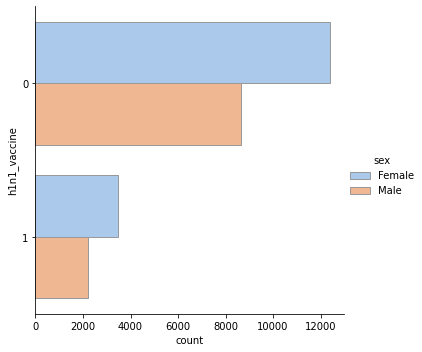

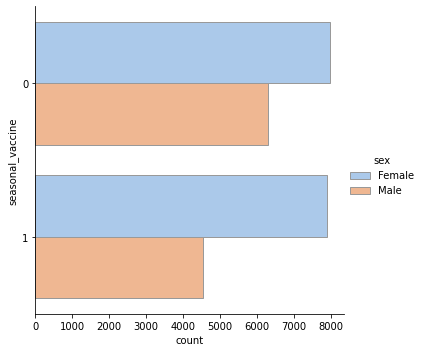

In [22]:
sns.catplot(y="h1n1_vaccine", hue="sex", kind="count", palette="pastel", edgecolor=".6", data=Data_Graph)
sns.catplot(y="seasonal_vaccine", hue="sex", kind="count", palette="pastel", edgecolor=".6", data=Data_Graph)

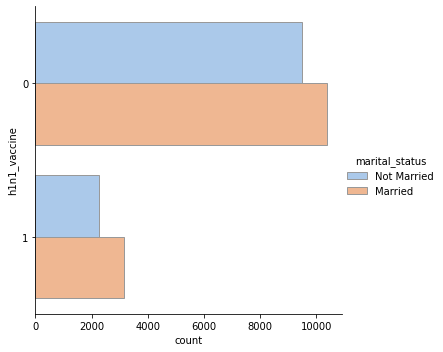

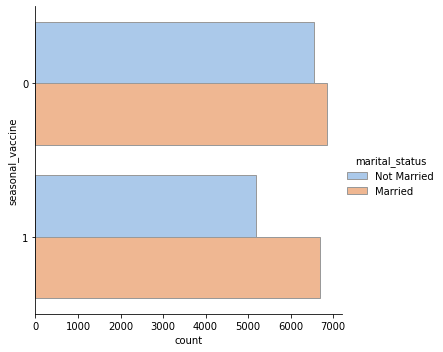

In [23]:
sns.catplot(y="h1n1_vaccine", hue="marital_status", kind="count", palette="pastel", edgecolor=".6", data=Data_Graph)
sns.catplot(y="seasonal_vaccine", hue="marital_status", kind="count", palette="pastel", edgecolor=".6", data=Data_Graph)

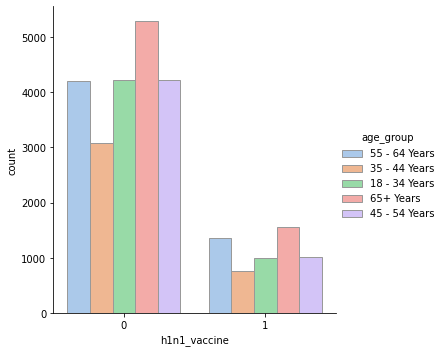

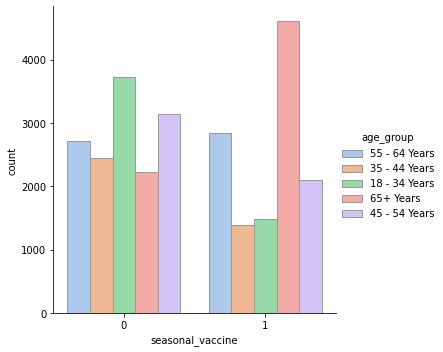

In [24]:
sns.catplot(x="h1n1_vaccine", hue="age_group", kind="count", palette="pastel", edgecolor=".6", data=Data_Graph)
sns.catplot(x="seasonal_vaccine", hue="age_group", kind="count", palette="pastel", edgecolor=".6", data=Data_Graph)

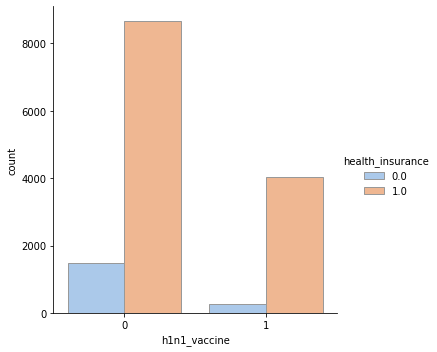

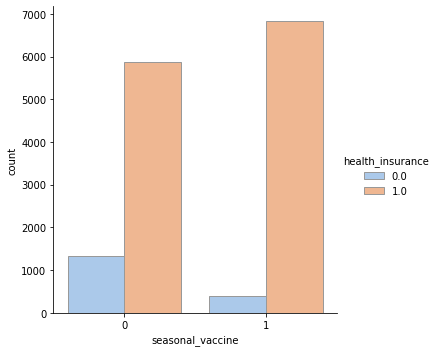

In [25]:
sns.catplot(x="h1n1_vaccine", hue="health_insurance", kind="count", palette="pastel", edgecolor=".6", data=Data_Graph)
sns.catplot(x="seasonal_vaccine", hue="health_insurance", kind="count", palette="pastel", edgecolor=".6", data=Data_Graph)

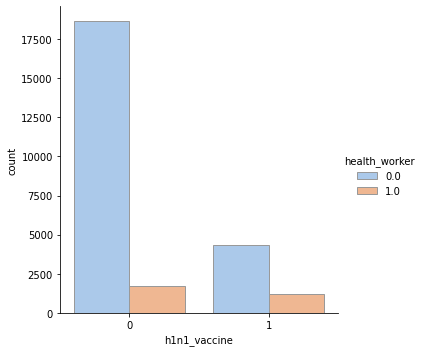

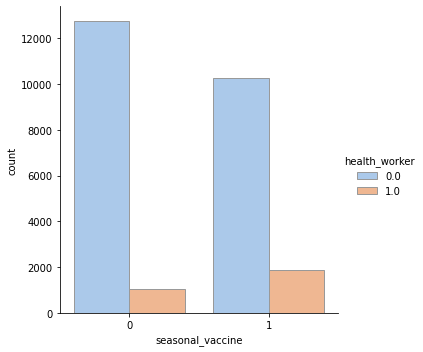

In [26]:
sns.catplot(x="h1n1_vaccine", hue="health_worker", kind="count", palette="pastel", edgecolor=".6", data=Data_Graph)
sns.catplot(x="seasonal_vaccine", hue="health_worker", kind="count", palette="pastel", edgecolor=".6", data=Data_Graph)

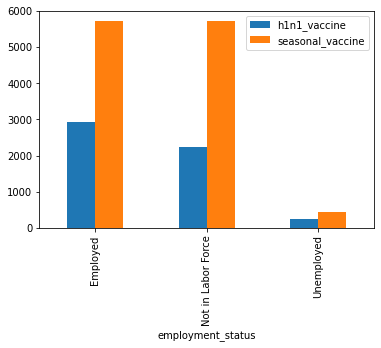

In [27]:
Data_Graph.groupby( by='employment_status' ).sum()[['h1n1_vaccine','seasonal_vaccine']].reset_index().plot( x='employment_status', y=['h1n1_vaccine','seasonal_vaccine'], kind='bar'  )

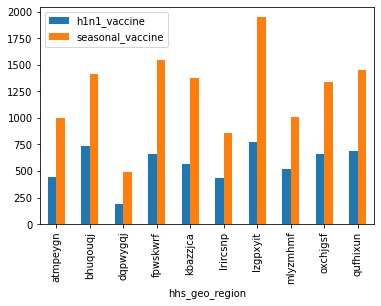

In [28]:
Data_Graph.groupby( by='hhs_geo_region' ).sum()[['h1n1_vaccine','seasonal_vaccine']].reset_index().plot( x='hhs_geo_region', y=['h1n1_vaccine','seasonal_vaccine'], kind='bar'  )

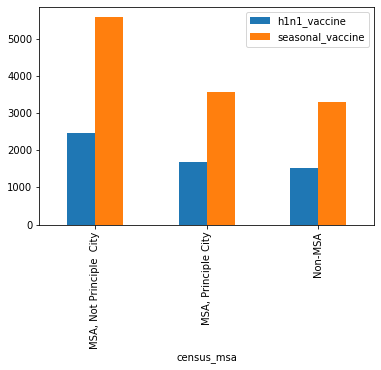

In [29]:
Data_Graph.groupby( by='census_msa' ).sum()[['h1n1_vaccine','seasonal_vaccine']].reset_index().plot( x='census_msa', y=['h1n1_vaccine','seasonal_vaccine'], kind='bar'  )

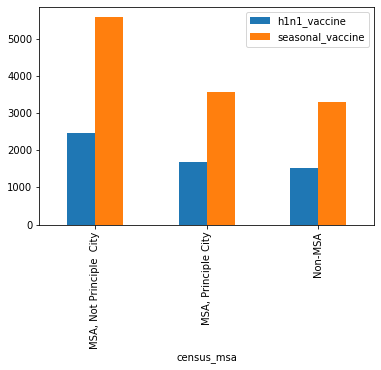

In [30]:
Data_Graph.groupby( by='census_msa' ).sum()[['h1n1_vaccine','seasonal_vaccine']].reset_index().plot( x='census_msa', y=['h1n1_vaccine','seasonal_vaccine'], kind='bar'  )

In [31]:
import plotly.express as px
fig = px.bar(x=Data_Graph.groupby( by='census_msa' ).sum().index, y=Data_Graph.groupby( by='census_msa' ).sum()["h1n1_vaccine"], barmode='group',
             height=500)
fig.show()

***

# Encoding Categorical and Ordinal Features

In [32]:
# Ordinal Encoding

feature_name = ordinal_features_list[10]
print(feature_name)
enc1 = OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=np.nan,
                     categories=[[ 'Below Poverty', '<= $75,000, Above Poverty', '> $75,000' ]])
enc1.fit( df[feature_name].values.reshape(-1,1) )
df[feature_name] = enc1.transform( df[feature_name].values.reshape(-1,1)  )

feature_name = ordinal_features_list[9]
print(feature_name)
enc2 = OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=np.nan,
                     categories=[[ '< 12 Years', '12 Years', 'Some College' ,'College Graduate'  ]])
enc2.fit( df[feature_name].values.reshape(-1,1) )
df[feature_name] = enc2.transform( df[feature_name].values.reshape(-1,1)  )

feature_name = ordinal_features_list[8]
print(feature_name)
enc3 = OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=np.nan,
                     categories=[['18 - 34 Years','35 - 44 Years','45 - 54 Years', '55 - 64 Years', '65+ Years']])
enc3.fit( df[feature_name].values.reshape(-1,1) )
df[feature_name] = enc3.transform( df[feature_name].values.reshape(-1,1)  )

income_poverty
education
age_group


In [33]:
# One Hot Encoding of Categorical Features

cat_temp = pd.DataFrame()
enc = OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=np.nan)
enc.fit( df[categorical_features_list] )
cat_temp[categorical_features_list] = enc.transform( df[categorical_features_list] )


df.drop( columns=categorical_features_list, inplace=True )
df = pd.concat( [df,cat_temp], axis=1 )
df.head()

,h1n1_concern,h1n1_knowledge,opinion_h1n1_vacc_effective,opinion_h1n1_risk,opinion_h1n1_sick_from_vacc,opinion_seas_vacc_effective,opinion_seas_risk,opinion_seas_sick_from_vacc,age_group,education,...,marital_status,health_worker,child_under_6_months,behavioral_outside_home,rent_or_own,employment_status,behavioral_avoidance,behavioral_antiviral_meds,behavioral_large_gatherings,employment_industry
0,1.0,0.0,3.0,1.0,2.0,2.0,1.0,2.0,3.0,0.0,...,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,NaN
1,3.0,2.0,5.0,4.0,4.0,4.0,2.0,4.0,1.0,1.0,...,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,12.0
2,1.0,1.0,3.0,1.0,1.0,4.0,1.0,2.0,0.0,3.0,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,14.0
3,1.0,1.0,3.0,3.0,5.0,5.0,4.0,1.0,4.0,1.0,...,1.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,NaN
4,2.0,1.0,3.0,3.0,2.0,3.0,1.0,4.0,2.0,2.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,18.0


In [34]:
df.isnull().sum()

h1n1_concern                      92
h1n1_knowledge                   116
opinion_h1n1_vacc_effective      391
opinion_h1n1_risk                388
opinion_h1n1_sick_from_vacc      395
opinion_seas_vacc_effective      462
opinion_seas_risk                514
opinion_seas_sick_from_vacc      537
age_group                          0
education                       1407
income_poverty                  4423
household_adults                 249
household_children               249
chronic_med_condition            971
employment_occupation          13470
census_msa                         0
behavioral_touch_face            128
sex                                0
hhs_geo_region                     0
race                               0
behavioral_face_mask              19
health_insurance               12274
behavioral_wash_hands             42
doctor_recc_h1n1                2160
doctor_recc_seasonal            2160
marital_status                  1408
health_worker                    804
c

In [35]:
Data['income_poverty'].unique()

array(['Below Poverty', '<= $75,000, Above Poverty', '> $75,000', nan],
      dtype=object)

***

# Checking Imbalance in Dataset

In [36]:
Data_target.head()

,h1n1_vaccine,seasonal_vaccine
0,0,0
1,0,1
2,0,0
3,0,1
4,0,0


In [37]:
barplot(Data_target,'h1n1_vaccine')
barplot(Data_target,'seasonal_vaccine')

***

# Train Test Split

In [38]:
X = df.copy()
y = df_target[ ['h1n1_vaccine', 'seasonal_vaccine'] ]
X_train, X_test, y_train, y_test = train_test_split( X,y,test_size=0.2, stratify=y )

In [39]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((21365, 35), (5342, 35), (21365, 2), (5342, 2))

In [40]:
X_train.isnull().sum()

h1n1_concern                      76
h1n1_knowledge                    92
opinion_h1n1_vacc_effective      314
opinion_h1n1_risk                312
opinion_h1n1_sick_from_vacc      315
opinion_seas_vacc_effective      372
opinion_seas_risk                413
opinion_seas_sick_from_vacc      433
age_group                          0
education                       1134
income_poverty                  3574
household_adults                 214
household_children               214
chronic_med_condition            771
employment_occupation          10772
census_msa                         0
behavioral_touch_face             92
sex                                0
hhs_geo_region                     0
race                               0
behavioral_face_mask              15
health_insurance                9808
behavioral_wash_hands             33
doctor_recc_h1n1                1736
doctor_recc_seasonal            1736
marital_status                  1128
health_worker                    652
c

In [41]:
fig = px.bar( x=['h1n1','seasonal'], y=y_test.sum().values )
fig.show()

***

# Imputing Missing Values

In [42]:
features_temp = list( set.intersection( set(categorical_features_list) , set(list_low_missing) ) )
imp_median_cat = SimpleImputer( strategy='median' )
imp_median_cat.fit( X_train[features_temp] )
X_train[features_temp] = imp_median_cat.transform( X_train[features_temp] )
X_test[features_temp] = imp_median_cat.transform( X_test[features_temp] )

features_temp = list( set.intersection( set(ordinal_features_list) , set(list_low_missing) ) )
imp_median_ord = SimpleImputer( strategy='median' )
imp_median_ord.fit( X_train[features_temp] )
X_train[features_temp] = imp_median_ord.transform( X_train[features_temp] )
X_test[features_temp] = imp_median_ord.transform( X_test[features_temp] )

features_temp = list( set.intersection( set(numerical_features_list) , set(list_low_missing) ) )
imp_mean = SimpleImputer( strategy='mean' )
imp_mean.fit( X_train[features_temp] )
X_train[features_temp] = imp_mean.transform( X_train[features_temp] )
X_test[features_temp] = imp_mean.transform( X_test[features_temp] )

In [43]:
X_train.head()

,h1n1_concern,h1n1_knowledge,opinion_h1n1_vacc_effective,opinion_h1n1_risk,opinion_h1n1_sick_from_vacc,opinion_seas_vacc_effective,opinion_seas_risk,opinion_seas_sick_from_vacc,age_group,education,...,marital_status,health_worker,child_under_6_months,behavioral_outside_home,rent_or_own,employment_status,behavioral_avoidance,behavioral_antiviral_meds,behavioral_large_gatherings,employment_industry
20861,0.0,2.0,5.0,5.0,4.0,4.0,4.0,4.0,1.0,3.0,...,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,4.0
10267,0.0,1.0,4.0,2.0,2.0,4.0,2.0,2.0,1.0,1.0,...,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,18.0
1829,2.0,1.0,4.0,4.0,2.0,4.0,4.0,2.0,3.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1303,1.0,1.0,4.0,1.0,2.0,4.0,2.0,2.0,3.0,2.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,NaN
781,2.0,1.0,4.0,4.0,4.0,5.0,4.0,2.0,4.0,1.0,...,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,NaN


In [44]:
X_train.isnull().sum()

h1n1_concern                       0
h1n1_knowledge                     0
opinion_h1n1_vacc_effective        0
opinion_h1n1_risk                  0
opinion_h1n1_sick_from_vacc        0
opinion_seas_vacc_effective        0
opinion_seas_risk                  0
opinion_seas_sick_from_vacc        0
age_group                          0
education                          0
income_poverty                  3574
household_adults                   0
household_children                 0
chronic_med_condition              0
employment_occupation          10772
census_msa                         0
behavioral_touch_face              0
sex                                0
hhs_geo_region                     0
race                               0
behavioral_face_mask               0
health_insurance                9808
behavioral_wash_hands              0
doctor_recc_h1n1                   0
doctor_recc_seasonal               0
marital_status                     0
health_worker                      0
c

In [45]:
# model = XGBRegressor()
# yy = X_train['income_poverty']
# XX = X_train.drop(columns='income_poverty')
# model.fit(XX,yy)

# sort = model.feature_importances_.argsort()
# plt.barh(X_train.columns[sort], model.feature_importances_[sort])
# plt.xlabel("Feature Importance")

In [46]:
model = XGBClassifier()
imputer_RFR = IterativeImputer( estimator=model, max_iter=3, random_state=0 ) 
imputer_RFR.fit(X_train)
imputed = imputer_RFR.transform(X_train)
imputed_X_train = pd.DataFrame(imputed, columns=X_train.columns)

/usr/local/lib/python3.7/dist-packages/sklearn/impute/_iterative.py:701: ConvergenceWarning:

[IterativeImputer] Early stopping criterion not reached.



Original Mean :  income_poverty    1.184756
dtype: float64
Original variable variance:  income_poverty    0.389753
dtype: float64
--------------------------------------------------------------------------------
Mean after mean imputation:  1.170936162729351
Percent change in Mean after imputation:  income_poverty   -1.166499
dtype: float64
Variance after mean imputation 0.36554989737842725
Percent change in Variance after imputation:  income_poverty   -6.209857
dtype: float64
--------------------------------------------------------------------------------


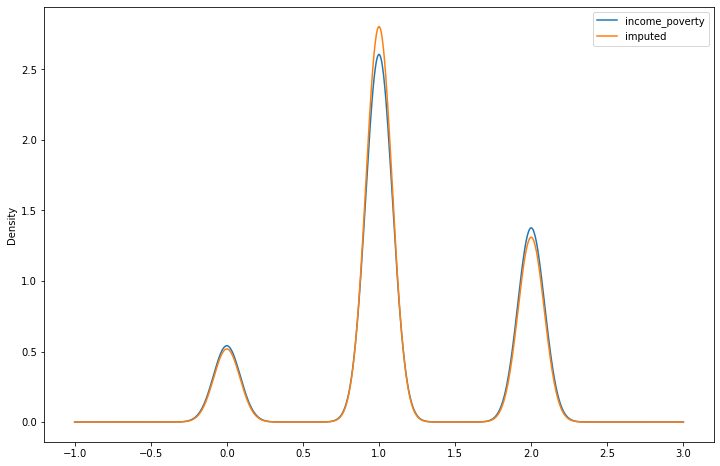

In [47]:
# Comparision of Original and Imputed Values

feature = ['income_poverty']
feature_df = pd.DataFrame()
feature_df[feature] = X_train[feature]
feature_df['imputed'] = imputed_X_train[feature]

original_mean = feature_df[feature].mean()
print("Original Mean : ",original_mean)
original_variance = X_train[feature].var()
print('Original variable variance: ', original_variance )

fig = px.box(feature_df)

print("--------------------------------------------------------------------------------")
print('Mean after mean imputation: ', feature_df['imputed'].mean())
print('Percent change in Mean after imputation: ', (feature_df['imputed'].mean()-original_mean)*100/original_mean)
print("Variance after mean imputation", feature_df['imputed'].var())
print('Percent change in Variance after imputation: ', (feature_df['imputed'].var()-original_variance)*100/original_variance) 
print("--------------------------------------------------------------------------------")

# plotting multiple density plot
feature_df.plot.kde(figsize = (12, 8),linewidth = 1.5)
# plotting the boxplot
fig = px.box(feature_df)
fig.show()

In [48]:
# Values and its distribution of features wtih high count of missing values before Imputation
barplot(X_train,list_high_missing[0])
barplot(X_train,list_high_missing[1])
barplot(X_train,list_high_missing[2])
barplot(X_train,list_high_missing[3])

In [49]:
X_train = imputed_X_train.copy()

imputed_test = imputer_RFR.transform(X_test)
X_test = pd.DataFrame(imputed_test, columns=X_test.columns)
X_test

,h1n1_concern,h1n1_knowledge,opinion_h1n1_vacc_effective,opinion_h1n1_risk,opinion_h1n1_sick_from_vacc,opinion_seas_vacc_effective,opinion_seas_risk,opinion_seas_sick_from_vacc,age_group,education,...,marital_status,health_worker,child_under_6_months,behavioral_outside_home,rent_or_own,employment_status,behavioral_avoidance,behavioral_antiviral_meds,behavioral_large_gatherings,employment_industry
0,2.0,2.0,4.0,2.0,2.0,5.0,4.0,2.0,2.0,3.0,...,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0
1,3.0,1.0,4.0,2.0,4.0,5.0,5.0,2.0,3.0,2.0,...,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,4.0
2,3.0,1.0,5.0,4.0,2.0,5.0,5.0,2.0,2.0,2.0,...,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,18.0
3,1.0,2.0,2.0,1.0,1.0,4.0,1.0,1.0,0.0,2.0,...,1.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,12.0
4,2.0,2.0,4.0,4.0,2.0,4.0,4.0,1.0,1.0,3.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5337,2.0,1.0,4.0,4.0,2.0,4.0,2.0,1.0,2.0,2.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,18.0
5338,1.0,1.0,5.0,1.0,2.0,5.0,2.0,2.0,3.0,3.0,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,12.0
5339,1.0,1.0,4.0,2.0,2.0,4.0,2.0,4.0,1.0,1.0,...,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,12.0
5340,3.0,2.0,3.0,4.0,4.0,5.0,5.0,5.0,3.0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,19.0


In [50]:
# Values and its distribution After Imputation
barplot(X_train,list_high_missing[0])
barplot(X_train,list_high_missing[1])
barplot(X_train,list_high_missing[2])
barplot(X_train,list_high_missing[3])

In [51]:
Columns = list( set(categorical_features_list)  ) 
X_train = pd.get_dummies( X_train, drop_first=True, dummy_na=False, columns=Columns )
X_test = pd.get_dummies( X_test, drop_first=True, dummy_na=False, columns=Columns )

In [52]:
X_test.columns

Index(['h1n1_concern', 'h1n1_knowledge', 'opinion_h1n1_vacc_effective',
       'opinion_h1n1_risk', 'opinion_h1n1_sick_from_vacc',
       'opinion_seas_vacc_effective', 'opinion_seas_risk',
       'opinion_seas_sick_from_vacc', 'age_group', 'education',
       'income_poverty', 'household_adults', 'household_children',
       'chronic_med_condition_1.0', 'employment_occupation_1.0',
       'employment_occupation_2.0', 'employment_occupation_3.0',
       'employment_occupation_4.0', 'employment_occupation_5.0',
       'employment_occupation_6.0', 'employment_occupation_7.0',
       'employment_occupation_8.0', 'employment_occupation_9.0',
       'employment_occupation_10.0', 'employment_occupation_11.0',
       'employment_occupation_12.0', 'employment_occupation_13.0',
       'employment_occupation_14.0', 'employment_occupation_15.0',
       'employment_occupation_16.0', 'employment_occupation_17.0',
       'employment_occupation_18.0', 'employment_occupation_19.0',
       'employment_

In [53]:
X_train.columns

Index(['h1n1_concern', 'h1n1_knowledge', 'opinion_h1n1_vacc_effective',
       'opinion_h1n1_risk', 'opinion_h1n1_sick_from_vacc',
       'opinion_seas_vacc_effective', 'opinion_seas_risk',
       'opinion_seas_sick_from_vacc', 'age_group', 'education',
       'income_poverty', 'household_adults', 'household_children',
       'chronic_med_condition_1.0', 'employment_occupation_1.0',
       'employment_occupation_2.0', 'employment_occupation_3.0',
       'employment_occupation_4.0', 'employment_occupation_5.0',
       'employment_occupation_6.0', 'employment_occupation_7.0',
       'employment_occupation_8.0', 'employment_occupation_9.0',
       'employment_occupation_10.0', 'employment_occupation_11.0',
       'employment_occupation_12.0', 'employment_occupation_13.0',
       'employment_occupation_14.0', 'employment_occupation_15.0',
       'employment_occupation_16.0', 'employment_occupation_17.0',
       'employment_occupation_18.0', 'employment_occupation_19.0',
       'employment_

***
# Applying ML Model

In [54]:
!pip install scikit-multilearn
from skmultilearn.problem_transform import BinaryRelevance
from skmultilearn.problem_transform import ClassifierChain
from skmultilearn.problem_transform import LabelPowerset
from sklearn.metrics import roc_auc_score
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import ExtraTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import RidgeClassifier
from sklearn import svm, tree, linear_model, neighbors, naive_bayes, ensemble
from sklearn import naive_bayes
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import SGDClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 89 kB 2.9 MB/s 


Applying Sklearn Models directly (those models which supports multi label classification)

In [55]:
# #
# models_direct = [ RandomForestClassifier(), DecisionTreeClassifier(), ExtraTreeClassifier(), KNeighborsClassifier(), RidgeClassifier() ]

# for model in models_direct:
#   model.fit( X_train, y_train )
#   print(model)
#   predictions = model.predict(X_test)
#   #  ROC_AUC_Score
#   score = roc_auc_score(y_test, predictions, average='macro')
#   print("Score = ",score)
#   print("\n")

In [56]:
X_test['employment_industry_13.0'] = list( np.zeros(X_test.shape[0]) )

Applying Classification Models using LabelPowerSet Method and Classifier Chain Method

In [57]:
# #
# Models_PT = [ RandomForestClassifier(), DecisionTreeClassifier(), ensemble.AdaBoostClassifier(), naive_bayes.GaussianNB(),
#               neighbors.KNeighborsClassifier(),svm.SVC(probability=True),LogisticRegression()]
# print( " Label PowerSet : " )
# print("\n")
# for model in Models_PT:
#   model = LabelPowerset(model)
#   model.fit( X_train, y_train )
#   print(model)
#   predictions = model.predict_proba(X_test)
#   #  ROC_AUC_Score
#   score = roc_auc_score(y_test, predictions.toarray(), average='macro')
#   print("Score = ",score)
#   print("\n")
# print( '------------------------------------------------------------------------------' )
# print( " Classifier Chain : " )
# print("\n")
# for model in Models_PT:
#   model = ClassifierChain(model)
#   model.fit( X_train, y_train )
#   print(model)
#   predictions = model.predict_proba(X_test)
#   #  ROC_AUC_Score
#   score = roc_auc_score(y_test, predictions.toarray(), average='macro')
#   print("Score = ",score)
#   print("\n")

In [58]:
# #
# model = ClassifierChain(XGBClassifier())
# model.fit(X_train, y_train)
# predictions = model.predict_proba(X_test)
# #  ROC_AUC_Score
# score = roc_auc_score(y_test, predictions.toarray(), average='macro')
# print("Score = ",score)
# print("\n")

In [59]:
# ### Hypertuning

# n_estimators = np.linspace(100, 3000, int((3000-100)/200) + 1, dtype=int) # Number of trees in random forest
# max_features = ['auto', 'sqrt'] # Number of features to consider at every split
# max_depth = [1, 5, 10, 25, 50, 100,200] # Maximum number of levels in tree
# min_samples_split = [1, 5, 10, 15, 30] # Minimum number of samples required to split a node # min_samples_split = [int(x) for x in np.linspace(start = 2, stop = 10, num = 9)]
# min_samples_leaf = [0.5, 1, 2, 4] # Minimum number of samples required at each leaf node
# bootstrap = [True, False] # Method of selecting samples for training each tree
# criterion=['gini', 'entropy'] # Criterion
# RFC_grid = {'n_estimators': n_estimators,
#                'max_features': max_features,
#                'max_depth': max_depth,
#                'min_samples_split': min_samples_split,
#                'min_samples_leaf': min_samples_leaf,
#                'bootstrap': bootstrap,
#                'criterion': criterion
#             }

# XGB_grid = {
#     "max_depth": [2, 3, 4, 5, 7],
#     "learning_rate": [0.1, 0.01, 0.05],
#     "gamma": [0, 0.25, 1],
#     "reg_lambda": [0, 1, 10],
#     "scale_pos_weight": [1, 3, 5],
#     "subsample": [0.8],
#     "colsample_bytree": [0.5],
# }

# SGDC_grid = {
#     'alpha': [1e-4, 1e-3, 1e-2, 1e-1, 1e0, 1e1, 1e2, 1e3], # learning rate
#     'n_iter': [1000], # number of epochs
#     'loss': ['hinge','log'], # logistic regression,
#     'penalty': ['l2', 'elasticnet'],
#     'learning_rate': ['constant','adaptive']}

# LR_grid = {
#             'fit_intercept': [True, False], #default: True
#              'penalty': ['l1','l2'],
#             'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'], #default: lbfgs
#              }

# SVC_grid = {
#             'C': [1,2,3,4,5], #default=1.0
#             'gamma': [.1, .25, .5, .75, 1.0], #edfault: auto
#             'decision_function_shape': ['ovo', 'ovr'], #default:ovr
#             'probability': [True]
#              }

# KN_grid = {'n_neighbors': [1,2,3,4,5,6,7], 'weights': ['uniform', 'distance'],
#             'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute']
#             }

# Grid = [ RFC_grid, SGDC_grid, KN_grid, SVC_grid, LR_grid ]

# for model in Models_Hyper_CrossVal:
#   model.fit( X_train, y_train )
#   grid = Grid[i]
#   GS_CV = GridSearchCV(estimator=model, param_grid=grid, cv = 3,verbose=3,scoring='roc_auc')
#   GS_CV.fit( X_train, y_train )
#   print("Best Paramter :", GS_CV.best_params_)
#   print('Best Score :', GS_CV.best_score_)
#   print(model)
#   predictions = model.predict(X_test)
#   #  ROC_AUC_Score
#   score = roc_auc_score(y_test, predictions, average='macro')
#   print("Score = ",score)
#   print("\n")

Final Model (Model with highest accuracy)

In [60]:
final_model = ClassifierChain(XGBClassifier())

final_model.fit( X_train, y_train )

predictions = final_model.predict_proba(X_test)

#  ROC_AUC_Score
score = roc_auc_score(y_test, predictions.toarray(), average='macro')
print("Score = ",score)
print("\n")

Score =  0.8530736572889892




In [61]:
predictions = pd.DataFrame.sparse.from_spmatrix(predictions)
predictions.rename(columns = {0:'h1n1_vaccine', 1:'seasonal_vaccine'}, inplace = True)
predictions

,h1n1_vaccine,seasonal_vaccine
0,0.096424,0.684694
1,0.159029,0.803236
2,0.365623,0.578440
3,0.022351,0.069346
4,0.476741,0.650333
...,...,...
5337,0.162802,0.179349
5338,0.568862,0.908053
5339,0.053888,0.115540
5340,0.149683,0.746297


Score =  0.8455099482821268




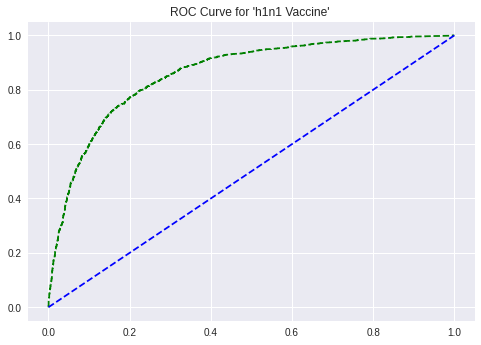

In [62]:
fpr, tpr, thresh = roc_curve(y_test['seasonal_vaccine'], predictions['seasonal_vaccine'])

plt.style.use('seaborn')
plt.plot(fpr, tpr, linestyle='--',color='green', label='Model_Name')

#  ROC_AUC_Score
score = roc_auc_score(y_test['h1n1_vaccine'], predictions['h1n1_vaccine'], average='macro')
print("Score = ",score)
print("\n")

# roc curve for tpr = fpr 
random_probs = [0 for i in range(len(y_test))]
p_fpr, p_tpr, _ = roc_curve(y_test['h1n1_vaccine'], random_probs, pos_label=1)
plt.plot(p_fpr, p_tpr, linestyle='--', color='blue')
plt.title( "ROC Curve for 'h1n1 Vaccine' " )
plt.show()

Score =  0.8606373662958515




Text(0.5, 1.0, " ROC Curve for 'Seasonal Vaccine' ")

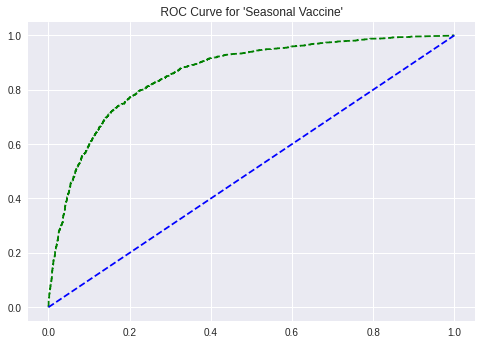

In [63]:
fpr, tpr, thresh = roc_curve(y_test['seasonal_vaccine'], predictions['seasonal_vaccine'])

plt.style.use('seaborn')
plt.plot(fpr, tpr, linestyle='--',color='green', label='Model_Name')

#  ROC_AUC_Score
score = roc_auc_score(y_test['seasonal_vaccine'], predictions['seasonal_vaccine'], average='macro')
print("Score = ",score)
print("\n")

# roc curve for tpr = fpr 
random_probs = [0 for i in range(len(y_test))]
p_fpr, p_tpr, _ = roc_curve(y_test['seasonal_vaccine'], random_probs, pos_label=1)
plt.plot(p_fpr, p_tpr, linestyle='--', color='blue')
plt.title( " ROC Curve for 'Seasonal Vaccine' " )

## Submission
 

In [64]:
Test_Features_Set = pd.read_csv('gdrive/MyDrive/Personal Data Science Projects/Flu Shot Learning/test_set_features.csv')
Test_Data_identifier = Test_Features_Set[['respondent_id']]
df = Test_Features_Set.copy()

In [65]:
list_low_missing = No_of_missing_values_df[ (No_of_missing_values_df.values<4000) & (No_of_missing_values_df.values != 0) ].index.values
list_high_missing = No_of_missing_values_df[ (No_of_missing_values_df.values>4000) & (No_of_missing_values_df.values != 0) ].index.values
numerical_features_list = ['household_adults','household_children']
unique_features_list = ['respondent_id']
ordinal_features_list = ['h1n1_concern','h1n1_knowledge','opinion_h1n1_vacc_effective','opinion_h1n1_risk',
                              'opinion_h1n1_sick_from_vacc','opinion_seas_vacc_effective','opinion_seas_risk',
                              'opinion_seas_sick_from_vacc','age_group','education','income_poverty']
categorical_features_list = list( set(df.columns.values)-set(numerical_features_list)-set(unique_features_list)-set(ordinal_features_list) ) 

In [66]:
# Ordinal Encoding
feature_name = ordinal_features_list[10]
print(feature_name)
enc1 = OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=np.nan,
                     categories=[[ 'Below Poverty', '<= $75,000, Above Poverty', '> $75,000' ]])
enc1.fit( df[feature_name].values.reshape(-1,1) )
df[feature_name] = enc1.transform( df[feature_name].values.reshape(-1,1)  )

feature_name = ordinal_features_list[9]
print(feature_name)
enc2 = OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=np.nan,
                     categories=[[ '< 12 Years', '12 Years', 'Some College' ,'College Graduate'  ]])
enc2.fit( df[feature_name].values.reshape(-1,1) )
df[feature_name] = enc2.transform( df[feature_name].values.reshape(-1,1)  )

feature_name = ordinal_features_list[8]
print(feature_name)
enc3 = OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=np.nan,
                     categories=[['18 - 34 Years','35 - 44 Years','45 - 54 Years', '55 - 64 Years', '65+ Years']])
enc3.fit( df[feature_name].values.reshape(-1,1) )
df[feature_name] = enc3.transform( df[feature_name].values.reshape(-1,1)  )


income_poverty
education
age_group


In [67]:
cat_temp = pd.DataFrame()
enc = OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=np.nan)
enc.fit( df[categorical_features_list] )
cat_temp[categorical_features_list] = enc.transform( df[categorical_features_list] )

df.drop( columns=categorical_features_list, inplace=True )
df = pd.concat( [df,cat_temp], axis=1 )

In [68]:
# Impution
features_temp = list( set.intersection( set(categorical_features_list) , set(list_low_missing) ) )
df[features_temp] = imp_median_cat.transform( df[features_temp] )

features_temp = list( set.intersection( set(ordinal_features_list) , set(list_low_missing) ) )
df[features_temp] = imp_median_ord.transform( df[features_temp] )

In [69]:
features_temp = list( set.intersection( set(numerical_features_list) , set(list_low_missing) ) )
df[features_temp] = imp_mean.transform( df[features_temp] )

In [70]:
df.drop(columns='respondent_id', inplace=True)

In [71]:
imputed = imputer_RFR.transform(df)
imputed_df = pd.DataFrame(imputed, columns=df.columns)

df = imputed_df.copy()

Columns = list( set(categorical_features_list)  ) 
df= pd.get_dummies( df, drop_first=True, dummy_na=False, columns=Columns )

In [72]:
# def Feature_Engineering( df ):
#       list_low_missing = No_of_missing_values_df[ (No_of_missing_values_df.values<4000) & (No_of_missing_values_df.values != 0) ].index.values
#       list_high_missing = No_of_missing_values_df[ (No_of_missing_values_df.values>4000) & (No_of_missing_values_df.values != 0) ].index.values
#       numerical_features_list = ['household_adults','household_children']
#       unique_features_list = ['respondent_id']
#       ordinal_features_list = ['h1n1_concern','h1n1_knowledge','opinion_h1n1_vacc_effective','opinion_h1n1_risk',
#                               'opinion_h1n1_sick_from_vacc','opinion_seas_vacc_effective','opinion_seas_risk',
#                               'opinion_seas_sick_from_vacc','age_group','education','income_poverty']
#       categorical_features_list = list( set(df.columns.values)-set(numerical_features_list)-set(unique_features_list)-set(ordinal_features_list) )     


#   feature_name = ordinal_features_list[10]
#   df[feature_name] = enc1.transform( df[feature_name].values.reshape(-1,1)  )

#   feature_name = ordinal_features_list[9]
#   df[feature_name] = enc2.transform( df[feature_name].values.reshape(-1,1)  )

#   feature_name = ordinal_features_list[8]
#   df[feature_name] = enc3.transform( df[feature_name].values.reshape(-1,1)  )

#   cat_temp = pd.DataFrame()
#   enc = OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=np.nan)
#   enc.fit( df[categorical_features_list] )
#   cat_temp[categorical_features_list] = enc.transform( df[categorical_features_list] )

#   df.drop( columns=categorical_features_list, inplace=True )
#   df = pd.concat( [df,cat_temp], axis=1 )

#   # Impution
#   features_temp = list( set.intersection( set(categorical_features_list) , set(list_low_missing) ) )
#   imp_median = SimpleImputer( strategy='median' )
#   imp_median.fit( df[features_temp] )
#   df[features_temp] = imp_median.transform( df[features_temp] )

#   features_temp = list( set.intersection( set(ordinal_features_list) , set(list_low_missing) ) )
#   imp_median = SimpleImputer( strategy='median' )
#   imp_median.fit( df[features_temp] )
#   df[features_temp] = imp_median.transform( df[features_temp] )

#   features_temp = list( set.intersection( set(numerical_features_list) , set(list_low_missing) ) )
#   imp_median = SimpleImputer( strategy='median' )
#   imp_median.fit( df[features_temp] )
#   df[features_temp] = imp_median.transform( df[features_temp] )

#   model = XGBClassifier()
#   imputer_RFR = IterativeImputer( estimator=model, max_iter=5, random_state=0 ) 
#   imputer_RFR.fit(df)
#   imputed = imputer_RFR.transform(df)
#   imputed_df = pd.DataFrame(imputed, columns=df.columns)

#   df = imputed_df.copy()

#   Columns = list( set(categorical_features_list)  ) 
#   df= pd.get_dummies( df, drop_first=True, dummy_na=False, columns=Columns )

#   return df

# df = Feature_Engineering(Test_Features_Set)

In [73]:
final_model = ClassifierChain(XGBClassifier())
final_model.fit(X_train,y_train)
final_predictions = final_model.predict_proba(df)

In [74]:
final_predictions = pd.DataFrame.sparse.from_spmatrix(final_predictions)
final_predictions.rename(columns={0:'h1n1_vaccine',1:'seasonal_vaccine'},inplace=True)

In [75]:
Submission_Data = pd.concat([Test_Data_identifier,final_predictions], axis='columns')
Submission_Data

,respondent_id,h1n1_vaccine,seasonal_vaccine
0,26707,0.093254,0.176697
1,26708,0.041129,0.038318
2,26709,0.420832,0.706482
3,26710,0.514178,0.944402
4,26711,0.276704,0.443346
...,...,...,...
26703,53410,0.292399,0.335992
26704,53411,0.109137,0.247165
26705,53412,0.091118,0.164350
26706,53413,0.056329,0.409864


In [77]:
#
list_objects_functions = { 'model':final_model,'enc':enc,'enc1':enc1,'enc2':enc2,'enc3':enc3,'imp_median_cat':imp_median_cat,'imp_median_ord':imp_median_ord,'imp_mean':imp_mean,'imputer_RFR':imputer_RFR }
# save the model to disk
import pickle
with open('model.pkl', 'wb') as files:
  pickle.dump(list_objects_functions, files)

In [76]:
# from google.colab import files

# Submission_Data.to_csv('Flu_Shot_Learning_Shirsh_Submission_File.csv', encoding = 'utf-8-sig', index=False) 
# files.download('Flu_Shot_Learning_Shirsh_Submission_File.csv')

***